# Data Vis. & Results

## Running the script

Running the script will give each time the sequence towards a max point. Below is few examples for different starting points. Also for all combinations of moving averages tried it wiill; 1. save the trades in a folder and 2. the result in a csv file.

![alt text](https://drive.google.com/uc?id=12O8-P1HxjQe0DTw3euT0oT2oiK80bxWb)

## Data Viz.

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import datetime
#!pip install yfinance
import yfinance as yf

In [5]:
df=pd.read_csv('result.csv')
df.head(4)

,sma_one,sma_two,result
0,20,75,0.032797
1,20,78,0.034518
2,20,81,0.035011
3,20,84,0.034796


We want to make a 3D graph with those results and change the color of the graph based on the value of result.

So the colors will be:

In [0]:
R=0
G=255
B=150
color_list=[]
for i in range(151):
    color_list.append('#%02x%02x%02x' % (R,G,B-i))
R=0
G=255
B=0
for i in range(256):
    color_list.append('#%02x%02x%02x' % (R+i,G,B))
R=255
G=255
B=0
for i in range(256):
    color_list.append('#%02x%02x%02x' % (R,G-i,B))

Matching values with colors.

In [0]:
value_splits=[(i/len(color_list))*(max(df['result'])-min(df['result']))+min(df['result']) for i in range(len(color_list)+1)]
colors=[]
for i in df['result']:
    for v in range(1,len(value_splits)):
        if value_splits[v-1]<=i and i<=value_splits[v]:
            colors.append(color_list[v-1])

The graph.

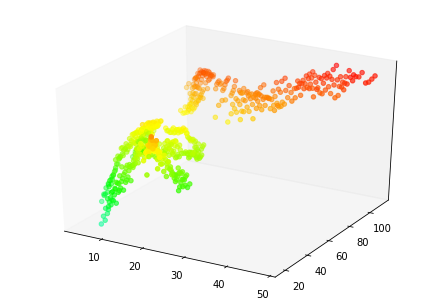

In [9]:
fig = pyplot.figure()

ax = Axes3D(fig)
ax.scatter(df['sma_one'],df['sma_two'],df['result'],c=colors)
ax.grid(False)
ax.set_zticks([])


pyplot.show()

Or on 2D.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


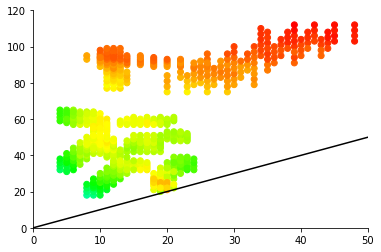

In [21]:
fig = pyplot.figure()
x = np.linspace(0,50,10000)
y = x
pyplot.plot(x,y,color='black')
ax = pyplot.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pyplot.ylim(0,120)
pyplot.xlim(0,50)
pyplot.scatter(df['sma_one'],df['sma_two'],c=colors)
pyplot.show()

Finding the best pair.

In [24]:
index_of_best_pair=[i for i in df['result']].index(max(df['result']))
sma_one=df['sma_one'][index_of_best_pair]
sma_two=df['sma_two'][index_of_best_pair]
print('Best pair is {} and {}'.format(sma_one,sma_two))

Best pair is 39 and 112


Examine that pair.

In [26]:
best=pd.read_csv('39_112.csv')
best.head(4)

,Ticker,Date,Last date,Time,Profit
0,AAPL,2009-04-01,2010-09-02,371,132.008461
1,AAPL,2010-09-14,2011-05-25,181,25.636051
2,AAPL,2011-07-25,2011-12-22,108,0.012551
3,AAPL,2012-01-06,2012-11-15,224,24.436550


So now we want to see if that would be profitable.

Finding first date.

In [38]:
first_date=datetime.date(2100,12,12)
for i in best['Date']:
  date_now=datetime.date(int(i.split('-')[0]),int(i.split('-')[1]),int(i.split('-')[2]))
  if first_date>date_now:
    first_date=date_now
print('First date is {}'.format(str(first_date)))

First date is 2005-05-12


We want to compare the strategy to the SP500

In [48]:
download=yf.download('SPY',start=str(first_date),end='2020-01-01',progress=False)
sp500=pd.DataFrame()
sp500['Date']=[i for i in download.index]
sp500['Close']=[i for i in download['Close']]
sp500.tail(4)

,Date,Close
3681,2019-12-26,322.940002
3682,2019-12-27,322.859985
3683,2019-12-30,321.079987
3684,2019-12-31,321.859985


We want to find two things. One is how many trades would be available each day. And number two compare our profits with SP. From that we can also calculate max dragdown.

In [50]:
def convert_string_to_date(string):
  return(datetime.date(int(string.split('-')[0]),int(string.split('-')[1]),int(string.split('-')[2])))

convert_string_to_date('2020-01-01') #Example

datetime.date(2020, 1, 1)